In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init("spark-2.4.4-bin-hadoop2.7") # SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!pwd
os.chdir('gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce')
!pwd
!ls

In [0]:
final_order = spark.read.format('json').\
            load('/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/final_order.json')

In [8]:
final_order.printSchema()

root
 |-- Carrier_Late(1)/on-time(0): long (nullable = true)
 |-- Carrier_Start_Date-Shipping_limit_Days: double (nullable = true)
 |-- Carrier_time_diff_Days: double (nullable = true)
 |-- Delivery_time_diff_Days: double (nullable = true)
 |-- Distance_Sell_Cust: double (nullable = true)
 |-- Estimated-Actual_Delivery_Days: double (nullable = true)
 |-- Late(1)/on-time(0): long (nullable = true)
 |-- Order_Approval_diff_Days: double (nullable = true)
 |-- Weight/volume: double (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_geolocation_lat: double (nullable = true)
 |-- customer_geolocation_lng: double (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: long (nullable = true)
 |-- freight/price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- id: long (nullable = true)
 |-- order_approved_at: str

## Let's change the data type!!

'review_creation_date', 'timestamp'
'review_answer_timestamp', 'timestamp'

In [0]:
from pyspark.sql.functions import to_timestamp
import pyspark.sql.functions as F
final_order = final_order.withColumn("order_purchase_timestamp", F.to_timestamp("order_purchase_timestamp", format='MM/dd/yyyy HH:mm'))\
                         .withColumn("order_approved_at", F.to_timestamp("order_approved_at", format='MM/dd/yyyy HH:mm'))\
                         .withColumn("order_delivered_carrier_date", F.to_timestamp("order_delivered_carrier_date", format='MM/dd/yyyy HH:mm'))\
                         .withColumn("order_delivered_customer_date", F.to_timestamp("order_delivered_customer_date", format='MM/dd/yyyy HH:mm'))\
                         .withColumn("order_estimated_delivery_date", F.to_timestamp("order_estimated_delivery_date", format='MM/dd/yyyy HH:mm'))

In [0]:
## change "review score" to IntegerType
from pyspark.sql.types import IntegerType
final_order = final_order.withColumn("review_score", final_order["review_score"].cast(IntegerType()))

In [11]:
final_order.printSchema()

root
 |-- Carrier_Late(1)/on-time(0): long (nullable = true)
 |-- Carrier_Start_Date-Shipping_limit_Days: double (nullable = true)
 |-- Carrier_time_diff_Days: double (nullable = true)
 |-- Delivery_time_diff_Days: double (nullable = true)
 |-- Distance_Sell_Cust: double (nullable = true)
 |-- Estimated-Actual_Delivery_Days: double (nullable = true)
 |-- Late(1)/on-time(0): long (nullable = true)
 |-- Order_Approval_diff_Days: double (nullable = true)
 |-- Weight/volume: double (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_geolocation_lat: double (nullable = true)
 |-- customer_geolocation_lng: double (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: long (nullable = true)
 |-- freight/price: double (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- id: long (nullable = true)
 |-- order_approved_at: tim

In [12]:
final_order.show()

+--------------------------+--------------------------------------+----------------------+-----------------------+------------------+------------------------------+------------------+------------------------+-------------------+---------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------------+-------------+---+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+--------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------

In [13]:
print final_order.columns ## Column Names
print "Row Count: ", final_order.count() ## Row Count
print "Column Count: ", len(final_order.columns) ## Column Count

['Carrier_Late(1)/on-time(0)', 'Carrier_Start_Date-Shipping_limit_Days', 'Carrier_time_diff_Days', 'Delivery_time_diff_Days', 'Distance_Sell_Cust', 'Estimated-Actual_Delivery_Days', 'Late(1)/on-time(0)', 'Order_Approval_diff_Days', 'Weight/volume', 'customer_city', 'customer_geolocation_lat', 'customer_geolocation_lng', 'customer_id', 'customer_state', 'customer_unique_id', 'customer_zip_code_prefix', 'freight/price', 'freight_value', 'id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_id', 'order_item_id', 'order_purchase_timestamp', 'order_status', 'payment_type_count', 'payment_type_value', 'price', 'product_category_name_english', 'product_description_lenght', 'product_height_cm', 'product_id', 'product_length_cm', 'product_name_lenght', 'product_photos_qty', 'product_weight_g', 'product_width_cm', 'review_comment_message', 'review_id', 'review_score', 'seller_city', 'seller_geolocation_lat', 'seller_ge

In [14]:
final_order.columns

['Carrier_Late(1)/on-time(0)',
 'Carrier_Start_Date-Shipping_limit_Days',
 'Carrier_time_diff_Days',
 'Delivery_time_diff_Days',
 'Distance_Sell_Cust',
 'Estimated-Actual_Delivery_Days',
 'Late(1)/on-time(0)',
 'Order_Approval_diff_Days',
 'Weight/volume',
 'customer_city',
 'customer_geolocation_lat',
 'customer_geolocation_lng',
 'customer_id',
 'customer_state',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'freight/price',
 'freight_value',
 'id',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_id',
 'order_item_id',
 'order_purchase_timestamp',
 'order_status',
 'payment_type_count',
 'payment_type_value',
 'price',
 'product_category_name_english',
 'product_description_lenght',
 'product_height_cm',
 'product_id',
 'product_length_cm',
 'product_name_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_width_cm',
 'review_comment_message',
 'review_id',
 'review_score',
 'seller_c

CEP: the Brazilian Zip Code
A brazilian zip code, also know as CEP, stands for Postal Adressing Code (Código de Endereçamento Postal) and contains 8 digits. Introduced in 1972 as a sequence of five digits, it was expanded to eight digits in 1992 to allow for more precise localization. The standard format is "nnnnn-nnn" (the original five digits, an hyphen, and the new three digits).

https://www.correios.com.br/a-a-z/cep-codigo-de-enderecamento-postal

CEP: 12.345-678

Most cities with population around 100,000 and above have a CEP assigned to every public place and to some high-occupancy private spaces, like major commercial buildings and large residential condos. Small towns are assigned a general 5-digit code followed by the suffix -000.

the first part is composed by 5 digits that represent Region, Subregion, Sector, Subsector and Subsector Splitter.
the second part contain 3 digits, separated by an hyphen from the first, and it represents the Distribution Identifiers.
More info about how CEP works may be found at the Correios website.

Lets look at the geolocation dataset provided by Olist and try to understand how CEP works geographically.

In [0]:
final_order_df = final_order.toPandas()

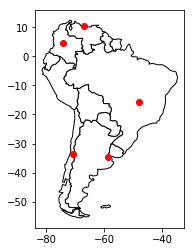

In [19]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

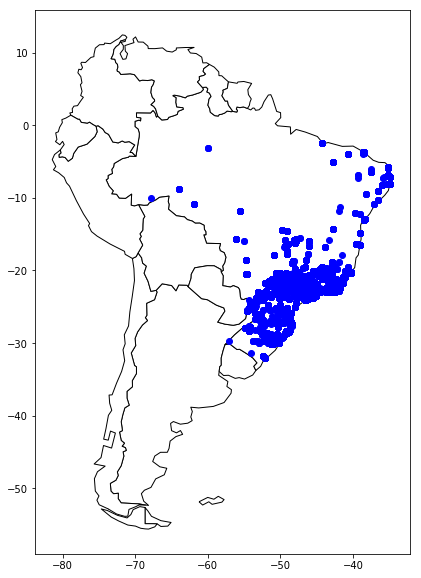

In [20]:
gdf = geopandas.GeoDataFrame(
    final_order_df, geometry=geopandas.points_from_xy(final_order_df.seller_geolocation_lng, final_order_df.seller_geolocation_lat))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue')

plt.show()

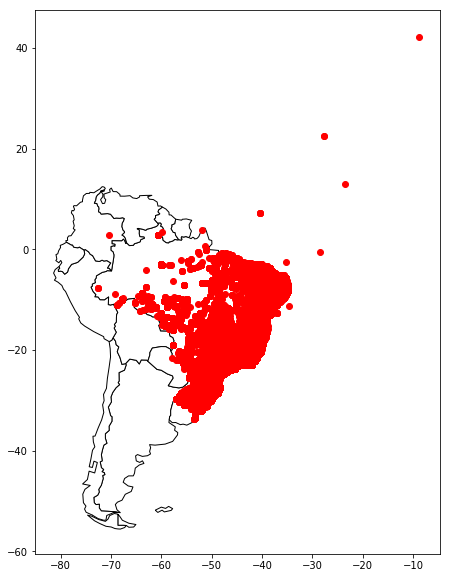

In [21]:
gdf = geopandas.GeoDataFrame(
    final_order_df, geometry=geopandas.points_from_xy(final_order_df.customer_geolocation_lng, final_order_df.customer_geolocation_lat))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [22]:
print(gdf.head())

   Carrier_Late(1)/on-time(0)  ...                           geometry
0                           0  ...  POINT (-48.05071816 -16.02294658)
1                           0  ...   POINT (-52.0454811 -27.23090863)
2                           1  ...  POINT (-48.97081828 -21.12102843)
3                           1  ...  POINT (-48.61619711 -27.59580821)
4                           1  ...   POINT (-51.60921297 -28.7822546)

[5 rows x 51 columns]


In [0]:
import geopandas

In [0]:
df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

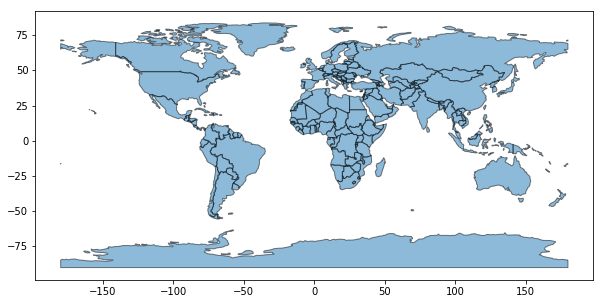

In [25]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

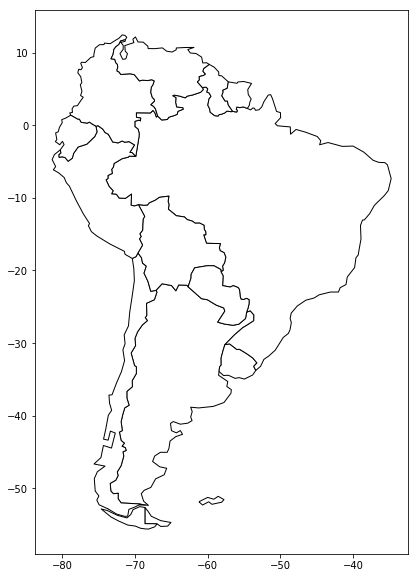

In [26]:
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')

In [0]:
df = df.to_crs(epsg=3857)

In [0]:
# #!pip install contextily
# #!pip install python-cartopy python3-cartopy

# #import cartopy
# import contextily as ctx

In [0]:
# ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# ctx.add_basemap(ax, zoom=12)

Text(76.7482,0.5,'Longitude')

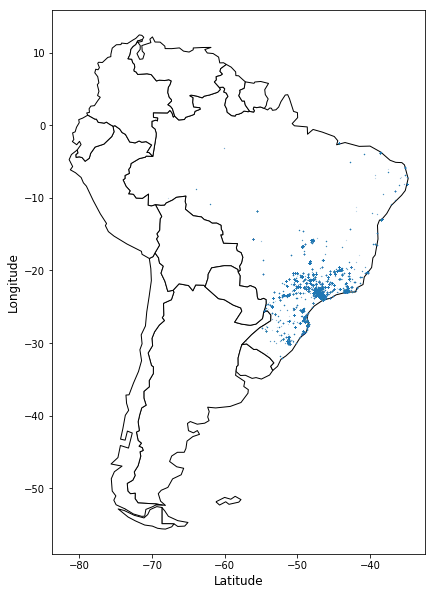

In [30]:
# import geopandas
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')
# plt.ylim(40.6,40.9)
# plt.xlim(-74.1,-73.7)
ax.scatter(final_order_df['seller_geolocation_lng'],final_order_df['seller_geolocation_lat'],s=0.01, alpha=1)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)

Text(76.7482,0.5,'Latitude')

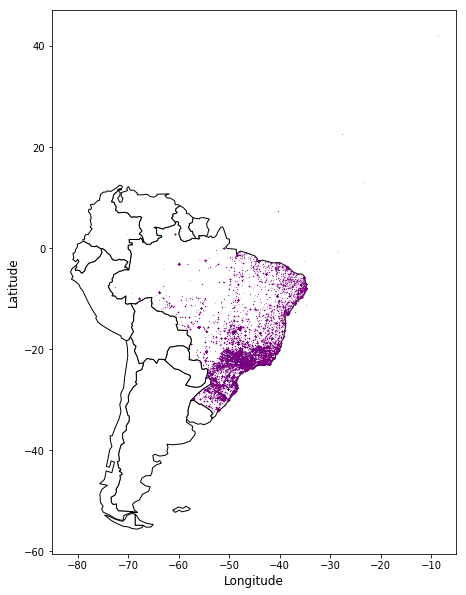

In [0]:
#fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
# plt.ylim(40.6,40.9)
# plt.xlim(-74.1,-73.7)
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')
ax.scatter(final_order_df['customer_geolocation_lng'],final_order_df['customer_geolocation_lat'],c='purple',s=0.01, alpha=1)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)

Text(76.7482,0.5,'Latitude')

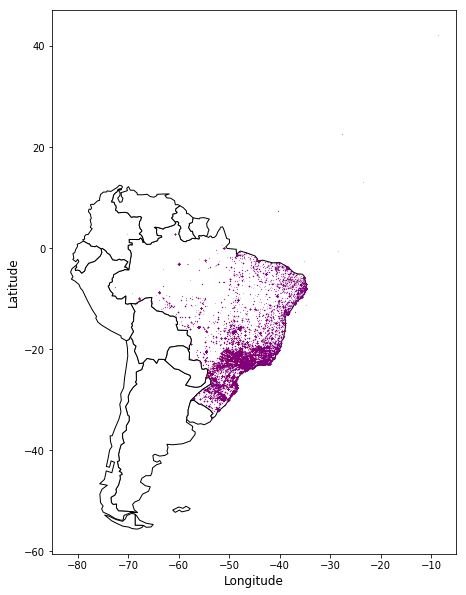

In [31]:
#fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
# plt.ylim(40.6,40.9)
# plt.xlim(-74.1,-73.7)
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')
ax.scatter(final_order_df['seller_geolocation_lng'],final_order_df['seller_geolocation_lat'],c='red',s=0.01, alpha=1)
ax.scatter(final_order_df['customer_geolocation_lng'],final_order_df['customer_geolocation_lat'],c='purple',s=0.01, alpha=1)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)

Text(0,0.5,'Longitude')

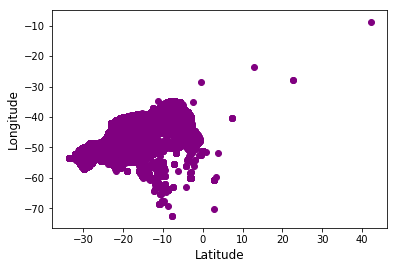

In [32]:
plt.scatter(final_order_df['seller_geolocation_lat'],final_order_df['seller_geolocation_lng'])
plt.scatter(final_order_df['customer_geolocation_lat'],final_order_df['customer_geolocation_lng'],c='purple')
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)

## Outliers from geolocations
There are two locations, pickup and dropoff location. To find out if there is any outliers, I combine them and plot the boxplot.

In [33]:
import numpy as np
outliers=np.array([False]*len(final_order_df))
outliers

array([False, False, False, ..., False, False, False])

In [34]:
print('There are %d rows that have missing values'%sum(final_order_df.isnull().any(axis=1)))

There are 112650 rows that have missing values


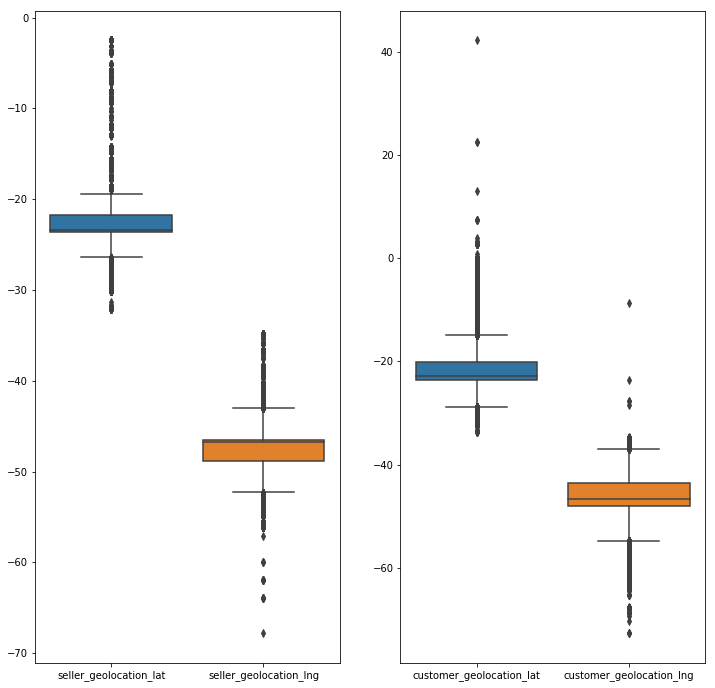

In [35]:
import seaborn as sns
plt.figure(figsize=(12,12))
for i,loc in enumerate((['seller_geolocation_lat','seller_geolocation_lng'],['customer_geolocation_lat','customer_geolocation_lng'])):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=final_order_df[outliers==False],order=loc);#plt.title(loc)

In [0]:
# outliers[final_order_df.seller_geolocation_lat<-110]=True
# outliers[final_order_df.seller_geolocation_lng<-110]=True
# outliers[final_order_df.customer_geolocation_lat>45]=True
# outliers[final_order_df.customer_geolocation_lng>45]=True
# print('There are total %d entries of ouliers'% sum(outliers))

In [37]:
final_order_df.columns

Index([u'Carrier_Late(1)/on-time(0)',
       u'Carrier_Start_Date-Shipping_limit_Days', u'Carrier_time_diff_Days',
       u'Delivery_time_diff_Days', u'Distance_Sell_Cust',
       u'Estimated-Actual_Delivery_Days', u'Late(1)/on-time(0)',
       u'Order_Approval_diff_Days', u'Weight/volume', u'customer_city',
       u'customer_geolocation_lat', u'customer_geolocation_lng',
       u'customer_id', u'customer_state', u'customer_unique_id',
       u'customer_zip_code_prefix', u'freight/price', u'freight_value', u'id',
       u'order_approved_at', u'order_delivered_carrier_date',
       u'order_delivered_customer_date', u'order_estimated_delivery_date',
       u'order_id', u'order_item_id', u'order_purchase_timestamp',
       u'order_status', u'payment_type_count', u'payment_type_value', u'price',
       u'product_category_name_english', u'product_description_lenght',
       u'product_height_cm', u'product_id', u'product_length_cm',
       u'product_name_lenght', u'product_photos_qty', u'pro

## K-means clustering using python, not pyspark

In [0]:
X = final_order_df.loc[:,['seller_geolocation_lat','seller_geolocation_lng']]
zp = final_order_df.seller_zip_code_prefix

In [0]:
from sklearn.cluster import KMeans
#run KMeans
id_n=8
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

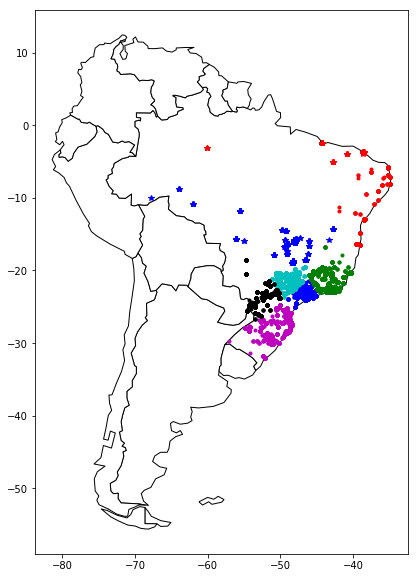

In [40]:
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
#plt.figure(figsize=(12,12))
#ax.set_ylabel('Latitude', fontsize=12)
#ax.set_xlabel('Longitude', fontsize=12)
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.seller_geolocation_lng[cluster].values,X.seller_geolocation_lat[cluster].values,ptsymb[i])
plt.show()

In [0]:
X_customer = final_order_df.loc[:,['customer_geolocation_lat','customer_geolocation_lng']]
zp_customer = final_order_df.customer_zip_code_prefix

In [0]:
from sklearn.cluster import KMeans
#run KMeans
id_n=8
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X_customer)
id_label=kmeans.labels_

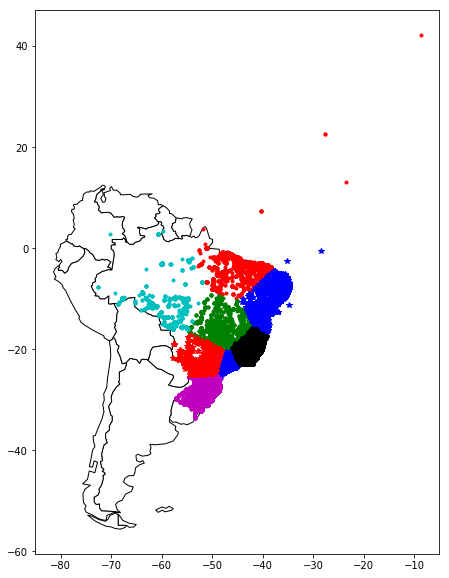

In [43]:
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
#plt.figure(figsize=(12,12))
#ax.set_ylabel('Latitude', fontsize=12)
#ax.set_xlabel('Longitude', fontsize=12)
ax = world[world.continent == 'South America'].plot(
    color='white', figsize=(8, 10), edgecolor='black')
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X_customer.customer_geolocation_lng[cluster].values,X_customer.customer_geolocation_lat[cluster].values,ptsymb[i])
plt.show()

In [0]:
from collections import Counter
#revise the clustering based on zipcode
uniq_zp=np.unique(zp)
for i in uniq_zp:
    a=np.where(zp==i)[0]
    c = Counter(id_label[a])
    c.most_common(1)[0][0]
    id_label[a]=c.most_common(1)[0][0]

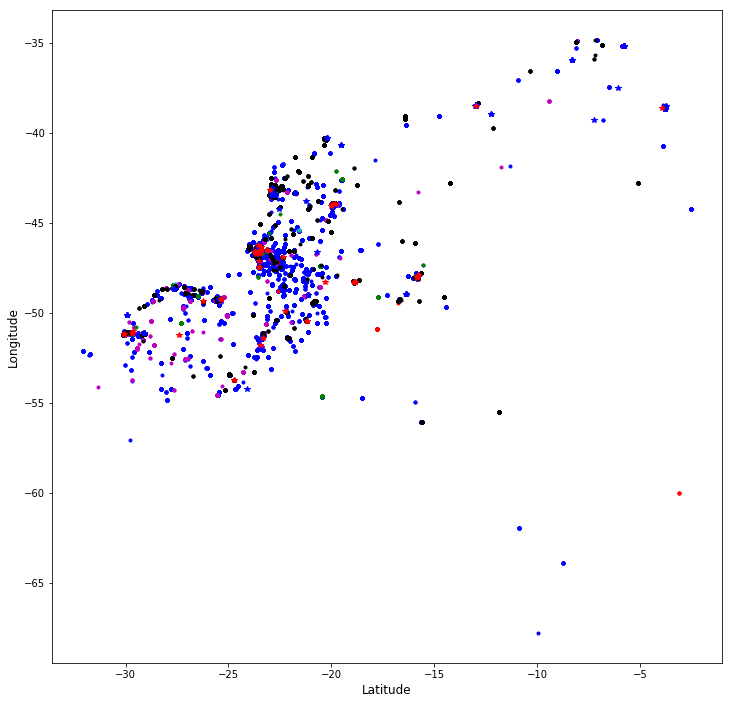

In [45]:
#plot result (revised)
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(X.seller_geolocation_lat[cluster].values,X.seller_geolocation_lng[cluster].values,ptsymb[i])
plt.show()

In [46]:
final_order_df.count()

Carrier_Late(1)/on-time(0)                112650
Carrier_Start_Date-Shipping_limit_Days    111458
Carrier_time_diff_Days                    110204
Delivery_time_diff_Days                   110204
Distance_Sell_Cust                        112650
Estimated-Actual_Delivery_Days            110204
Late(1)/on-time(0)                        112650
Order_Approval_diff_Days                  112650
Weight/volume                             112650
customer_city                             112650
customer_geolocation_lat                  112650
customer_geolocation_lng                  112650
customer_id                               112650
customer_state                            112650
customer_unique_id                        112650
customer_zip_code_prefix                  112650
freight/price                             112650
freight_value                             112650
id                                        112650
order_approved_at                              0
order_delivered_carr

In [0]:
import folium # goelogical map
map_1 = folium.Map(location=[-23.5505,-46.6333], tiles='OpenStreetMap', zoom_start=6)
#tile: 'OpenStreetMap','Stamen Terrain','Mapbox Bright','Mapbox Control room'
for each in final_order_df[:112650].iterrows():
    folium.CircleMarker([each[1]['seller_geolocation_lat'],each[1]['seller_geolocation_lng']],
                        radius=3,
                        color='purple',
                        popup=str(each[1]['seller_geolocation_lat'])+','+str(each[1]['seller_geolocation_lng']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
    folium.CircleMarker([each[1]['customer_geolocation_lat'],each[1]['customer_geolocation_lng']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['customer_geolocation_lat'])+','+str(each[1]['customer_geolocation_lng']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

In [47]:
import folium # goelogical map
map_1 = folium.Map(location=[-23.5505,-46.6333], tiles='OpenStreetMap', zoom_start=6)
#tile: 'OpenStreetMap','Stamen Terrain','Mapbox Bright','Mapbox Control room'
for each in final_order_df[:1000].iterrows():
    folium.CircleMarker([each[1]['seller_geolocation_lat'],each[1]['seller_geolocation_lng']],
                        radius=3,
                        color='red',
                        popup=str(each[1]['seller_geolocation_lat'])+','+str(each[1]['seller_geolocation_lng']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

/usr/local/lib/python2.7/dist-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [57]:
final_order.select('customer_zip_code_prefix').describe().show()

+-------+------------------------+
|summary|customer_zip_code_prefix|
+-------+------------------------+
|  count|                  112650|
|   mean|      35119.309090102084|
| stddev|      29866.120800820157|
|    min|                    1003|
|    max|                   99990|
+-------+------------------------+



In [49]:
final_order.select('seller_zip_code_prefix').describe().show()

+-------+----------------------+
|summary|seller_zip_code_prefix|
+-------+----------------------+
|  count|                112650|
|   mean|    24439.170430537062|
| stddev|    27596.030908876768|
|    min|                  1001|
|    max|                 99730|
+-------+----------------------+



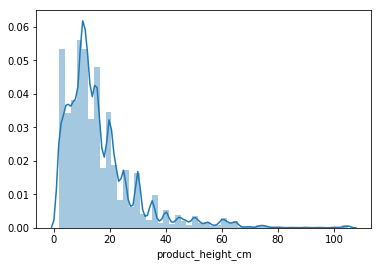

In [58]:
#Visualizing the data - displot
import seaborn as sns
plot_product_height = sns.distplot(final_order_df["product_height_cm"].dropna())

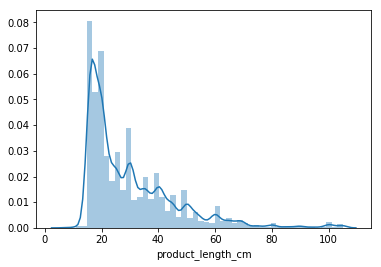

In [59]:
plot_product_length = sns.distplot(final_order_df["product_length_cm"].dropna())

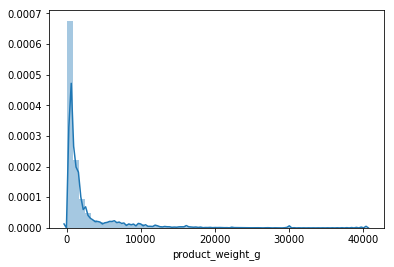

In [60]:
plot_product_weight = sns.distplot(final_order_df["product_weight_g"].dropna())

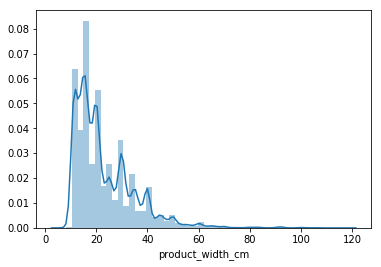

In [61]:
plot_product_width = sns.distplot(final_order_df["product_width_cm"].dropna())

There are some outliers coordinates in the dataset that are outside of brazilian territory. Lets guarantee that all coordinates are within a rectangle delimited by the limits of Brazil.
https://en.wikipedia.org/wiki/Geography_of_Brazil

The national territory extends 4,378 kilometers (2,720 mi) from north to south (5°16'18" N to 33°45'02" S latitude), and 4,326 kilometers (2,688 mi) from east to west (34°47'35" W to 73°58'58" W longitude). 

In [0]:
# # Removing some outliers
# #Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
# final_order = final_order[final_order.geolocation_lat <= 5.27438888]
# #it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
# final_order = final_order[final_order.geolocation_lng >= -73.98283055]
# #It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
# geo = geo[geo.geolocation_lat >= -33.75116944]
# #It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
# geo = geo[geo.geolocation_lng <=  -34.79314722]

### Clustering for seller geolocation

#### Step 1 - assemble your features
In contrast to most ML packages out there, Spark ML requires your input features to be gathered in a single column of your dataframe, usually named features; and it provides a specific method for doing this, VectorAssembler:

payment_type_count
payment_type_value
total_payment                                 
product_height_cm
product_length_cm
Product_weight_g
product_width_cm
review_score
f/p
Wt/vol
Delivery_time_diff_Days
Order_Approval_diff_Days
Estimated-Actual_Delivery_Days
Late(1)/on-time(0)
Carrier_Start_Date-Shipping_limit_Days
Carrier_Late(1)/on-time(0)

In [63]:
#Step 1 - assemble your features
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=['seller_geolocation_lat','seller_geolocation_lng'], outputCol="features")
final_order_seller_geo = vecAssembler.transform(final_order)
final_order_seller_geo.show()

+--------------------------+--------------------------------------+----------------------+-----------------------+------------------+------------------------------+------------------+------------------------+-------------------+---------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------------+-------------+---+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+--------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------

As perhaps already guessed, the argument inputCols serves to tell VectoeAssembler which particular columns in our dataframe are to be used as features.

#### Step 2 - fit your KMeans model

In [0]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2, seed=1)  # 2 clusters here
model = kmeans.fit(final_order_seller_geo.select('features'))

#### Step 3 - transform your initial dataframe to include cluster assignments

In [0]:
transformed = model.transform(final_order_seller_geo)
transformed.show(3) 

+-------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------+---+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------+--------------------+-------------+--------------------+----------+
|customer_city|customer_geolocation_lat|customer_geolocation_lng|         customer_id|customer_state|  customer_unique_id|customer_zip_code_prefix|freight_value|

In [0]:
transformed.select('product_weight_g','product_length_cm','product_height_cm').show(4) 

+----------------+-----------------+-----------------+
|product_weight_g|product_length_cm|product_height_cm|
+----------------+-----------------+-----------------+
|             325|               19|               20|
|             400|               19|               13|
|             400|               19|               13|
|             400|               21|                5|
+----------------+-----------------+-----------------+
only showing top 4 rows



In [0]:
## Checking the Elbow Point (WSSSE)
import numpy as np
wssse = np.zeros(60)
for k in range(2,60):
    kmeans = KMeans(featuresCol='features',k=k)
    model = kmeans.fit(final_order_seller_geo.select('features'))
    wssse[k] = model.computeCost(final_order_seller_geo.select('features'))
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse[k]))
    print('--'*30)

    # kmeans = KMeans()\
    #         .setK(k)\
    #         .setSeed(1) \
    #         .setFeaturesCol("indexedFeatures")\
    #         .setPredictionCol("cluster")
    # model = kmeans.fit(data)
    # cost[k] = model.computeCost(data) # requires Spark 2.0 or later

With K=2
Within Set Sum of Squared Errors = 1152351.315507852
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 816762.2952939292
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 680063.0116933954
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 454369.8186778576
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 326497.1735641281
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 198767.43047635976
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 190651.6312235297
------------------------------------------------------------
With K=9
Within Set Sum of Squared Errors = 163718.46835096425
------------------------------------------------------------
With K=10
With

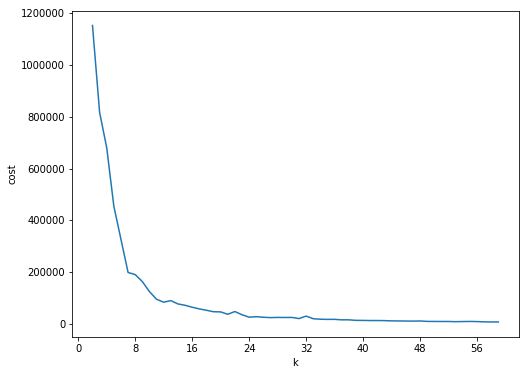

In [0]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,60),wssse[2:60])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [0]:
kmeans_seller_geo = KMeans(featuresCol='features',k=16)

model_seller_geo = kmeans_seller_geo.fit(final_order_seller_geo.select('features'))
 
wssse_seller_geo = model_seller_geo.computeCost(final_order_seller_geo.select('features'))
 

print("With K=50")
print("Within Set Sum of Squared Errors = " + str(wssse_seller_geo))
print('--'*30)

With K=50
Within Set Sum of Squared Errors = 64592.3882812
------------------------------------------------------------


In [0]:
model_seller_geo.transform(final_order_seller_geo.select('features')).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|        12|  647|
|         1|  431|
|        13|45225|
|         6| 2367|
|         3| 4824|
|         5|11797|
|        15| 5708|
|         9|12132|
|         4| 4522|
|         8| 6152|
|         7| 2888|
|        10|  633|
|        11| 2695|
|        14| 2800|
|         2| 7966|
|         0| 1863|
+----------+-----+



In [0]:
from pyspark.ml.clustering import KMeans
#from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(16)
model = kmeans.fit(final_order_seller_geo.select('features'))
#transformed = model.transform(final_order_seller_geo).drop('features')
transformed = model.transform(final_order_seller_geo)

In [0]:
transformed.filter(transformed.prediction==1).show(5)

+-------------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------+----------+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------+--------------------+-------------+--------------------+----------+
|      customer_city|customer_geolocation_lat|customer_geolocation_lng|         customer_id|customer_state|  customer_unique_id|customer_zip_code_pr

In [0]:
from pyspark.sql.functions import mean
transformed.filter(transformed.prediction==0).select(mean("product_weight_g")).alias("Mean prodcut weight").show()

+---------------------+
|avg(product_weight_g)|
+---------------------+
|   1549.1286652483582|
+---------------------+



In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(transformed)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.674980939087


In [0]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[-23.60951335 -46.74664108]
[-23.41418211 -51.78189385]
[ -8.24230986 -35.13423031]
[-19.8743329  -43.99067002]
[-29.78767013 -51.26527791]
[-22.77257834 -43.27237625]
[-16.09010753 -55.84955021]
[-20.358743   -45.45770832]
[ -4.54114393 -41.80119694]
[-20.49766057 -47.56651739]
[-15.79688105 -47.96812566]
[-21.81678049 -48.81726737]
[-18.77099312 -48.23853969]
[-20.34289908 -40.51450427]
[-25.45649735 -49.30633182]
[-21.75628321 -51.55430001]
[ -2.5012422  -44.24816337]
[-27.50459258 -48.57038697]
[-12.8786869  -38.36588389]
[-22.72599277 -47.54494863]
[-21.83619227 -47.47042551]
[-20.75861368 -49.47752039]
[-22.32544968 -46.52371797]
[-21.97713518 -45.24735664]
[-28.54195117 -49.22050217]
[-22.99210024 -46.88354314]
[-26.76015553 -48.99231825]
[-23.98439349 -46.38531274]
[-28.16051854 -53.62592378]
[-16.80395286 -49.31612744]
[-18.76802007 -46.52810613]
[-26.96642422 -50.84084037]
[-20.02370938 -42.78226435]
[ -3.88013891 -38.62269107]
[-21.68486765 -42.85042676]
[-

In [0]:
transformed.show()

+---------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------+---+-----------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+--------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------+--------------------+-------------+--------------------+----------+
|  customer_city|customer_geolocation_lat|customer_geolocation_lng|         customer_id|customer_state|  customer_unique_id|customer_zip_code_prefix|freight_

#### Assign clusters to events
Their is one import thing left to do; assigning the individual rows to the nearest cluster centroid. That can be done with the transform method, which adds 'prediction' column to the dataframe. The prediction value is an integer between 0 and k, but it has no correlation to the y value of the input.

In [0]:
# import matplotlib.pyplot as plt

# plt.scatter(transformed.seller_geolocation_lat,transformed.seller_geolocation_lng, c=transformed.prediction)

In [0]:
import folium
from folium.plugins import MarkerCluster

/usr/local/lib/python2.7/dist-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [0]:
#create map of São Paulo in Brazil using latitude and longitude values
map_brazil = folium.Map(location=[-23.5505,-46.6333], zoom_start=5)
map_brazil

### Clustering for Customer geolocation

In [0]:
#Step 1 - assemble your features
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=['customer_geolocation_lat','customer_geolocation_lng'], outputCol="features")
final_order_customer_geo = vecAssembler.transform(final_order)
final_order_customer_geo.show()

+---------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------+---+--------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+--------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------+--------------------+-------------+--------------------+
|  customer_city|customer_geolocation_lat|customer_geolocation_lng|         customer_id|customer_state|  customer_unique_id|customer_zip_code_prefix|freight_value| i

As perhaps already guessed, the argument inputCols serves to tell VectoeAssembler which particular columns in our dataframe are to be used as features.

#### Step 2 - fit your KMeans model

In [0]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2, seed=1)  # 2 clusters here
model = kmeans.fit(final_order_customer_geo.select('features'))

#### Step 3 - transform your initial dataframe to include cluster assignments

In [0]:
transformed = model.transform(final_order_customer_geo)
transformed.show(3) 

+-------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------+---+--------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------+--------------------+-------------+--------------------+----------+
|customer_city|customer_geolocation_lat|customer_geolocation_lng|         customer_id|customer_state|  customer_unique_id|customer_zip_code_prefix|freight_val

In [0]:
transformed.select('product_weight_g','product_length_cm','product_height_cm').show(4) 

+----------------+-----------------+-----------------+
|product_weight_g|product_length_cm|product_height_cm|
+----------------+-----------------+-----------------+
|             325|               19|               20|
|             400|               19|               13|
|             400|               19|               13|
|             400|               21|                5|
+----------------+-----------------+-----------------+
only showing top 4 rows



In [0]:
## Checking the Elbow Point (WSSSE)
for k in range(2,9):
    kmeans = KMeans(featuresCol='features',k=k)
    model = kmeans.fit(final_order_customer_geo.select('features'))
    wssse = model.computeCost(final_order_customer_geo.select('features'))
    print("With K={}".format(k))
    print("Within Set Sum of Squared Errors = " + str(wssse))
    print('--'*30)

With K=2
Within Set Sum of Squared Errors = 2539863.92499
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = 1793536.53062
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = 1459929.77783
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = 1054752.57186
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = 775282.840698
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = 684487.893014
------------------------------------------------------------
With K=8
Within Set Sum of Squared Errors = 537477.422618
------------------------------------------------------------


In [0]:
kmeans_customer_geo = KMeans(featuresCol='features',k=7)

model_customer_geo = kmeans_customer_geo.fit(final_order_customer_geo.select('features'))
 
wssse_customer_geo = model_customer_geo.computeCost(final_order_customer_geo.select('features'))
 
print("With K=7")
print("Within Set Sum of Squared Errors = " + str(wssse_customer_geo))
print('--'*30)

With K=7
Within Set Sum of Squared Errors = 684487.893014
------------------------------------------------------------


In [0]:
model_customer_geo.transform(final_order_customer_geo.select('features')).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 9728|
|         6|45186|
|         3| 2236|
|         5| 7638|
|         4|10182|
|         2|10714|
|         0|26966|
+----------+-----+



In [0]:
from pyspark.ml.clustering import KMeans
#from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans().setK(7)
model = kmeans.fit(final_order_customer_geo.select('features'))
transformed = model.transform(final_order_customer_geo).drop('features')

In [0]:
transformed.filter(transformed.prediction==1).show(5)

+-----------------+------------------------+------------------------+--------------------+--------------+--------------------+------------------------+-------------+---+--------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+------------------------+------------+------------------+--------------------+-----+-----------------------------+--------------------------+-----------------+--------------------+-----------------+-------------------+------------------+----------------+----------------+----------------------+--------------------+--------------------+------------+-----------+----------------------+----------------------+--------------------+------------+----------------------+--------------------+-------------+----------+
|    customer_city|customer_geolocation_lat|customer_geolocation_lng|         customer_id|customer_state|  customer_unique_id|customer_zip_code_prefix|freight_value| id|   ord

In [0]:
from pyspark.sql.functions import mean
transformed.filter(transformed.prediction==0).select(mean("product_weight_g")).alias("Mean prodcut weight").show()

+---------------------+
|avg(product_weight_g)|
+---------------------+
|   2196.2565091610413|
+---------------------+



In [0]:
# from pyspark.sql.functions import col, when

# transformed.filter(transformed.prediction==0).groupBy("product_weight_g") \
#     .count() \
#     .orderBy(col("count").desc()) \
#     .show(20,False)

In [0]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[-21.41950027 -43.09311968]
[ -8.65145054 -38.36953382]
[-28.65315345 -51.0393839 ]
[ -4.6960367  -53.10271754]
[-23.21756252 -50.72765992]
[-16.29474996 -49.08512739]
[-23.24587042 -46.75293109]


Let's make maps through using clusters

In [0]:
import folium
from folium.plugins import MarkerCluster

In [0]:
#create map of São Paulo in Brazil using latitude and longitude values
map_brazil = folium.Map(location=[-23.5505,-46.6333], zoom_start=12)
map_brazil

In [0]:
# marker_pos1=[-21.30689508 -43.72837261]
# marker_pos2=[-23.39998282 -46.69969132]
# marker_pos3=[ -8.0619754 -38.8286642]
# marker_pos4=[-29.55234991 -51.38153851]
# marker_pos5=[-23.25984071 -52.07440369]
# marker_pos6=[-20.9170938  -48.65642006]
# marker_pos7=[-26.25136307 -49.25616261]

In [0]:
# folium.Marker(location=marker_pos1,popup='cluster1').add_to(map_brazil)
# folium.Marker(location=marker_pos2,popup='cluster2').add_to(map_brazil)
# folium.Marker(location=marker_pos3,popup='cluster3').add_to(map_brazil)
# folium.Marker(location=marker_pos4,popup='cluster4').add_to(map_brazil)
# folium.Marker(location=marker_pos5,popup='cluster5').add_to(map_brazil)
# folium.Marker(location=marker_pos6,popup='cluster6').add_to(map_brazil)
# folium.Marker(location=marker_pos7,popup='cluster7').add_to(map_brazil)
# map_brazil